In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, norm, normaltest
import math
import scipy.stats as stats
import statsmodels.api as sm

from pathlib import Path

#from scipy.spatial.distance import yule

In [2]:
# Definição de diretórios e Disco de leitura dos arquivos (Desktop ou Notebook) 
config_dirs = open("prefixo_dados.txt").readlines() 
DIR_PREFIXO = Path(config_dirs[0].strip())

DIRETORIO_PRINCIPAL =  DIR_PREFIXO / "Projeto_PA" / "Projeto_PA_validado"
DIR_REGLOG = DIRETORIO_PRINCIPAL / "KMeansRandom" / "regressao_logistica"
DIR_BASE = DIRETORIO_PRINCIPAL / "analise_abordagens"

In [3]:
#caminho = DIRETORIO_PRINCIPAL / DIR_KMEANS
#caminho
#diretorios = {'dict':DIR_DICT,'kmeans':DIR_KMEANS, 'nmf':DIR_NMF}

nome_abordagem = {'cadastro':"_qtd_approach_cadastro", 'doenca':"_qtd_approach_doenca",
                  'medidas':"_qtd_approach_medidas",'medidas_importantes':"_qtd_approach_medidas_importantes",
                  'medidas_masc':"_qtd_approach_medidas_masc",
                  'medidas_fem':"_qtd_approach_medidas_fem",'estatistica':"_qtd_approach_estatistica",
                 'escolho_doenca':"_qtd_approach_escolho_doenca", 'categorias':"_qtd_approach_categorias"}

In [4]:
#DIR_DICT / f"Dict_approach_doenca
#_grupo_{grupo}.csv", 

# Análise é uma opção do dicionário criado na célula acima
algoritmo = input("Informe a análise ")

#KMEANS_qtd_approach_categorias.csv
caminho_medidas = DIR_BASE / f"{algoritmo.upper()}{nome_abordagem['medidas']}.csv"
#caminho_medidas_importantes = DIR_BASE / f"{algoritmo.upper()}{nome_abordagem['medidas_importantes']}.csv"
caminho_medidas_masc = DIR_BASE / f"{algoritmo.upper()}{nome_abordagem['medidas_masc']}.csv"
caminho_medidas_fem = DIR_BASE / f"{algoritmo.upper()}{nome_abordagem['medidas_fem']}.csv"
caminho_estatistica = DIR_BASE / f"{algoritmo.upper()}{nome_abordagem['estatistica']}.csv"
caminho_doenca = DIR_BASE / f"{algoritmo.upper( )}{nome_abordagem['doenca']}.csv"
caminho_cadastro = DIR_BASE / f"{algoritmo.upper()}{nome_abordagem['cadastro']}.csv"
caminho_escolho_doenca = DIR_BASE / f"{algoritmo.upper()}{nome_abordagem['escolho_doenca']}.csv"
caminho_categorias = DIR_BASE / f"{algoritmo.upper()}{nome_abordagem['categorias']}.csv"

#, caminho_medidas_importantes

lista_caminhos = [caminho_medidas, caminho_medidas_masc, caminho_medidas_fem, caminho_doenca, caminho_cadastro, caminho_categorias]

#,'_medidas_importantes'

lista_onde_salva = ['_medidas','_medidas_masc','_medidas_fem', '_doenca','_cadastro','_categorias']

Informe a análise kmeans


In [5]:
#mapa_variaveis = caminho_medidas + k clusters (binário)
df_medidas_completo = pd.read_csv(DIRETORIO_PRINCIPAL / "KMeansRandom/KMEANS_approach_medidas_todos_pacientes.csv",
                                  sep=';', encoding='latin1')


def genero_0_1(genero):
    if genero.lower() == 'f':
        return 0
    else:
        return 1
    
def nova_abordagem(df):
    saida = df.copy()
    saida['genero'] = saida['genero'].apply(genero_0_1)
    
    for doenca in saida.loc[:,'Hipotensao':'Normotenso']:
        saida[doenca] = saida[doenca].astype(int)
        
    for i in range(len(set(df['grupo']))):
        ls_grupo = []
        for paciente in df['grupo']:
            if paciente == i + 1:
                ls_grupo.append(1)
            else:
                ls_grupo.append(0)
        saida[f'Grupo {i+1}'] = ls_grupo
    return saida

#D:\Projeto_PA\Projeto_PA_validado\KMeansRandom\KMEANS_approach_medidas_todos_pacientes_reglog.csv

In [6]:
dataset_reglog = nova_abordagem(df_medidas_completo)
dataset_reglog

,numero_identificacao,data_nascimento,genero,idade,peso,altura,IMC,grupo,data_exame,sist 9:00,...,Picos Sistolica,Picos Diastolica,Diferença % Dipping,Grupo 1,Grupo 2,Grupo 3,Grupo 4,Grupo 5,Grupo 6,Grupo 7
0,4,1923-10-05,1,94.0,85.0,160,33.2,1,2018-09-10 12:25:23,105.0,...,11,34,0.966110,1,0,0,0,0,0,0
1,5,1948-10-07,1,70.0,80.0,165,29.4,1,2018-12-26 07:39:41,103.0,...,9,23,0.969464,1,0,0,0,0,0,0
2,6,1999-03-23,1,19.0,100.0,197,25.8,3,2018-12-26 08:06:19,147.0,...,19,19,1.055812,0,0,1,0,0,0,0
3,7,1978-01-26,0,40.0,65.0,"1,64",24.2,3,2018-12-26 08:19:06,140.0,...,21,9,1.106757,0,0,1,0,0,0,0
4,8,1990-03-07,1,28.0,120.0,172,40.6,2,2018-12-26 08:26:59,113.0,...,10,11,1.136996,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19145,21786,1972-11-25,1,47.0,75.0,165,27.5,5,2020-09-10 16:03:08,163.0,...,49,60,1.134475,0,0,0,0,1,0,0
19146,21787,1970-10-19,1,49.0,90.0,183,26.9,6,2020-09-10 16:21:02,114.0,...,32,27,1.045759,0,0,0,0,0,1,0
19147,21788,1985-03-15,0,35.0,93.0,167,33.3,1,2020-09-10 16:44:53,107.0,...,14,26,1.029243,1,0,0,0,0,0,0
19148,21792,1952-04-21,0,68.0,64.0,160,25.0,2,2020-09-10 17:25:50,94.0,...,19,13,1.251898,0,1,0,0,0,0,0


## Regressão Logística com Var Independente e Var Dependente

In [7]:
for doenca in dataset_reglog.loc[:,'Hipotensao':'Normotenso'].columns:
    
    '''
    grupos=''
    for grupo in set(dataset_reglog['grupo']):
        if (grupo == list(set(dataset_reglog['grupo']))[-1]):
            grupos += f"\'Grupo {grupo}\'"
        else:
            grupos += f"\'Grupo {grupo}\',"
        print(grupos)'''
    y_dependente = dataset_reglog[[doenca]]
    #print (y_dependente)
    X_independente = dataset_reglog[['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4', 'Grupo 5','Grupo 6','Grupo 7', 'genero']]
    #print (X_independente)
    sm_model = sm.MNLogit(y_dependente, X_independente).fit()

    # print(sm_model.pvalues)
    #dir(sm_model)
    resposta = sm_model.summary()
    print(resposta)
    with open(f'{DIR_REGLOG}/reglog_{doenca}.csv','w') as f:
        f.write(resposta.as_csv())

         Current function value: 0.223031
         Iterations: 35
                          MNLogit Regression Results                          
Dep. Variable:             Hipotensao   No. Observations:                19150
Model:                        MNLogit   Df Residuals:                    19142
Method:                           MLE   Df Model:                            7
Date:                Sun, 20 Feb 2022   Pseudo R-squ.:                  0.3095
Time:                        13:35:38   Log-Likelihood:                -4271.0
converged:                      False   LL-Null:                       -6185.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
Hipotensao=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Grupo 1         16.1191     56.462      0.285      0.775     -94.545     126.783
Grupo 2          4.9790      0.183     27.249      0.000   

c:\users\marta\anaconda3\envs\emoti\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.008652
         Iterations: 35
                          MNLogit Regression Results                          
Dep. Variable:      Sistolica Isolada   No. Observations:                19150
Model:                        MNLogit   Df Residuals:                    19142
Method:                           MLE   Df Model:                            7
Date:                Sun, 20 Feb 2022   Pseudo R-squ.:                 0.06739
Time:                        13:35:38   Log-Likelihood:                -165.68
converged:                      False   LL-Null:                       -177.65
Covariance Type:            nonrobust   LLR p-value:                  0.001165
Sistolica Isolada=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Grupo 1               -23.3005   1978.341     -0.012      0.991   -3900.778    3854.177
Grupo 2                -6.3321      0.

c:\users\marta\anaconda3\envs\emoti\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.024609
         Iterations: 35
                          MNLogit Regression Results                          
Dep. Variable:     Diastolica Isolada   No. Observations:                19150
Model:                        MNLogit   Df Residuals:                    19142
Method:                           MLE   Df Model:                            7
Date:                Sun, 20 Feb 2022   Pseudo R-squ.:                 0.09037
Time:                        13:35:39   Log-Likelihood:                -471.26
converged:                      False   LL-Null:                       -518.08
Covariance Type:            nonrobust   LLR p-value:                 2.217e-17
Diastolica Isolada=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Grupo 1                -43.8985   5.96e+07  -7.36e-07      1.000   -1.17e+08    1.17e+08
Grupo 2                 -5.1458    

c:\users\marta\anaconda3\envs\emoti\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                          MNLogit Regression Results                          
Dep. Variable:            Non Dipping   No. Observations:                19150
Model:                        MNLogit   Df Residuals:                    19142
Method:                           MLE   Df Model:                            7
Date:                Sun, 20 Feb 2022   Pseudo R-squ.:                0.001238
Time:                        13:35:39   Log-Likelihood:                -13174.
converged:                       True   LL-Null:                       -13190.
Covariance Type:            nonrobust   LLR p-value:                 3.062e-05
Non Dipping=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Grupo 1          -0.0462      0.038     -1.227      0.220      -0.120       0.028
Grupo 2          -0.1091      0.034     -3.173      0.002      -0.177      -0.042
Grupo 3          -0.1852      0.049     

c:\users\marta\anaconda3\envs\emoti\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.002701
         Iterations: 35
                          MNLogit Regression Results                          
Dep. Variable:             Normotenso   No. Observations:                19150
Model:                        MNLogit   Df Residuals:                    19142
Method:                           MLE   Df Model:                            7
Date:                Sun, 20 Feb 2022   Pseudo R-squ.:                  0.1712
Time:                        13:35:40   Log-Likelihood:                -51.715
converged:                      False   LL-Null:                       -62.398
Covariance Type:            nonrobust   LLR p-value:                  0.003265
Normotenso=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Grupo 1        -28.1331   1.43e+04     -0.002      0.998    -2.8e+04     2.8e+04
Grupo 2         -7.9100      1.027     -7.703      0.000   

c:\users\marta\anaconda3\envs\emoti\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [8]:
resposta.as_text()
with open('D:\Projeto_PA\Projeto_PA_validado\KMeansRandom\\teste.csv','w') as f:
    f.write(resposta.as_csv())

In [9]:
y_dependente = dataset_reglog[['Whitecoat']]
#y_dependente = dataset_reglog[['Non Dipping']]
#y_dependente = dataset_reglog[['Dipping']]
#y_dependente = dataset_reglog[['Diastolica Isolada']]
#y_dependente = dataset_reglog[['Sistolica Isolada']]
#y_dependente = dataset_reglog[['Hipotensao']]
#print (y_dependente)
X_independente = dataset_reglog[['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4', 'Grupo 5','Grupo 6','Grupo 7', 'genero']]
#print (X_independente)
sm_model = sm.MNLogit(y_dependente, X_independente).fit()

# print(sm_model.pvalues)
#dir(sm_model)
sm_model.summary()
#resposta = sm_model.summary()


Optimization terminated successfully.
         Current function value: 0.540848
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:              Whitecoat   No. Observations:                19150
Model:                        MNLogit   Df Residuals:                    19142
Method:                           MLE   Df Model:                            7
Date:                Sun, 20 Feb 2022   Pseudo R-squ.:                  0.1312
Time:                        13:35:40   Log-Likelihood:                -10357.
converged:                       True   LL-Null:                       -11922.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
Whitecoat=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Grupo 1         0.1624      0.038      4.264      0.000       0.088       0.237
Grupo 2         0.0909      0.035      2.566      0.010       0.021       0.160
Grupo 3         1.7003      0.066     25.878      0.000       1.571       1.829
Grupo 4         0.4580      0.040     11.422      0.000       0.379       0.537
Grupo 5         4.4195      0.319     13.855      0.000       3.794       5.045
Grupo 6         3.3395      0.109     30.535      0.000       3.125       3.554
Grupo 7         1.4199      0.042     33.557      0.000       1.337       1.503
genero         -0.2429      0.035     -6.948      0.000      -0.311      -0.174
===============================================================================
"""

In [10]:
#from sklearn import datasets, linear_model
#from sklearn.feature_selection import chi2
#
#X = np.asarray(grupos[0]["Whitecoat"]).astype(int)[:, np.newaxis]
#sm_model = sm.Logit(grupos[0]["genero"], sm.add_constant(X)).fit(disp=0)
#print(sm_model.pvalues)
#sm_model.summary()

In [11]:
print(sm.MNLogit(y_dependente, X_independente).__doc__)


    Multinomial Logit Model

    Parameters
    ----------
    endog : array_like
        `endog` is an 1-d vector of the endogenous response.  `endog` can
        contain strings, ints, or floats or may be a pandas Categorical Series.
        Note that if it contains strings, every distinct string will be a
        category.  No stripping of whitespace is done.
    exog : array_like
        A nobs x k array where `nobs` is the number of observations and `k`
        is the number of regressors. An intercept is not included by default
        and should be added by the user. See `statsmodels.tools.add_constant`.
    missing : str
        Available options are 'none', 'drop', and 'raise'. If 'none', no nan
        checking is done. If 'drop', any observations with nans are dropped.
        If 'raise', an error is raised. Default is 'none'.
    check_rank : bool
        Check exog rank to determine model degrees of freedom. Default is
        True. Setting to False reduces model initiali

In [12]:
## Aplica a funções Teste Exato de Fisher para cálculo do p_value

#  Calcula o p_value na tabela de contigência (clusters) 2x2


#stats.fisher_exact()

#df_abordagem = pd.read_csv(lista_caminhos[3], sep=";", encoding='latin1')
#df_abordagem.index = df_abordagem['Cluster'].values
#df_abordagem = df_abordagem.drop(['Cluster'], axis = 1)
#df_doencas = df_abordagem.loc[['Sistolica Isolada','Diastolica Isolada','Dipping','Non Dipping','Extreme Dipping','Reverse Dipping','Morning Surge','Masked','Whitecoat'], :]
#        
##df_genero = df_abordagem.loc[['Masculino','Feminino'], :]
##saida_genero = analisa_genero(df_genero)
##df_genero
#df_doencas

'''Factor            w-statin  wo-statin
AgeGroups Cancer                     
0-5       No           108       6575
          Yes            0        223
11-15     No             5       3669
          Yes            1        143
16-20     No            28       6174
          Yes            1        395
21-25     No            80       8173
          Yes            2        624
26-30     No           110       9143
          Yes            2        968
30-35     No           171       9046
          Yes            5       1225
35-40     No           338       8883
          Yes           21       1475'''
cancer = ['No','Yes','No','Yes','No','Yes','No','Yes','No','Yes','No','Yes','No','Yes']
w = [108,0,5,1,28,1,80,2,110,2,171,5,338,21]
wo = [6575,223,3669,143,6174,395,8173,624,9143,968,9046,1225,8883,1475]

In [13]:
len(cancer) == len(w) ==len(wo)

df = pd.DataFrame()
df['Cancer'] = cancer
df['w-statin'] = w
df['wo-statin'] = wo
df

,Cancer,w-statin,wo-statin
0,No,108,6575
1,Yes,0,223
2,No,5,3669
3,Yes,1,143
4,No,28,6174
5,Yes,1,395
6,No,80,8173
7,Yes,2,624
8,No,110,9143
9,Yes,2,968


In [14]:
table = df.groupby(["Cancer"]).sum().values
print(table)

df.groupby(["Cancer"]).sum()

df_abordagem = pd.read_csv(lista_caminhos[0], sep=";", encoding='latin1')
df_abordagem.index = df_abordagem['Cluster'].values
df_abordagem = df_abordagem.drop(['Cluster'], axis = 1)
df_genero = df_abordagem.loc[['Masculino','Feminino'], :]
df_genero

[[  840 51663]
 [   32  5053]]


,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7
Masculino,828.0,1982.0,616.0,961.0,364.0,1368.0,2586.0
Feminino,2138.0,2141.0,1131.0,1884.0,378.0,930.0,1843.0


In [15]:
lista_caminhos[0]

WindowsPath('D:/Projeto_PA/Projeto_PA_validado/analise_abordagens/KMEANS_qtd_approach_medidas.csv')

In [16]:
oddsratio, pvalue = stats.fisher_exact(table)
oddsratio, pvalue

(2.5674322048661518, 2.7241893835122457e-09)

In [17]:
df_genero_or= pd.DataFrame()
or_ls = []
p_ls = []
cluster_ls = []
for i in range(1,df_genero.shape[1]):
    for j in  range(df_genero.shape[0] - 1):
        OR, p = stats.fisher_exact(df_genero.iloc[[-1,j],[0,i]])
        or_ls.append(round(OR,2))
        p_ls.append(round(p,2))
        cluster_ls.append(f'cluster {i+1}')
df_genero_or['Cluster 1'] = cluster_ls
df_genero_or['OR'] = or_ls
df_genero_or['p'] = p_ls
df_genero_or


,Cluster 1,OR,p
0,cluster 2,2.39,0.0
1,cluster 3,1.41,0.0
2,cluster 4,1.32,0.0
3,cluster 5,2.49,0.0
4,cluster 6,3.80,0.0
5,cluster 7,3.62,0.0


In [18]:
df_abordagem
df_analise = pd.DataFrame()
df_genero = df_abordagem.loc[['Masculino','Feminino'], :]
df_genero.index = range(2)
df_idade = df_abordagem.loc[['Adultos','Meia-idade','Idoso'],:]
#df_idade = df_abordagem.loc[['Jovens','Adultos','Meia-idade','Idoso','Ancião','Velhice extrema'],:]
df_idade.index = range(1,4)
df_imc = df_abordagem.loc[['Peso Normal','Sobrepeso','Obesidade'],:]
#df_imc = df_abordagem.loc[['Abaixo do peso','Peso Normal','Sobrepeso','Obesidade grau 1','Obesidade grau 2','Obesidade Grau 3'],:]
df_imc.index = range(1,4)

ls_coluna = []
ls_or = []
ls_p = []
for cluster in range(1, len(df_abordagem.columns)):
    ls_coluna.append(f'cluster {cluster+1}')
    ls_or.append('')
    ls_p.append('')
    
    #genero
    for genero in range(len(df_genero) - 1):
        OR, p = stats.fisher_exact(df_genero.iloc[[-1,genero],[0,cluster]])
        ls_or.append(round(OR,2))
        ls_p.append(round(p,4))
        ls_coluna.append(f'[genero = {genero}]')
    
    #idade
    for idade in range(len(df_idade) - 1):
        OR, p = stats.fisher_exact(df_idade.iloc[[-1,idade],[0,cluster]])
        ls_or.append(round(OR,2))
        ls_p.append(round(p,4))
        ls_coluna.append(f'[idade = {idade+1}]')
    
    #imc
    for imc in range(len(df_imc) - 1):
        OR, p = stats.fisher_exact(df_imc.iloc[[-1,imc],[0,cluster]])
        ls_or.append(round(OR,2))
        ls_p.append(round(p,4))
        ls_coluna.append(f'[IMC = {imc + 1}]')

df_analise['Cluster 1'] = ls_coluna
df_analise['OR'] = ls_or
df_analise['p'] = ls_p
df_analise.to_excel ( DIR_BASE / f"oddsratio_{'medidas'}.xlsx", index = False)

df_idade

,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7
1,1095.0,2035.0,218.0,606.0,200.0,1122.0,2240.0
2,891.0,1420.0,412.0,729.0,240.0,793.0,1499.0
3,980.0,668.0,1117.0,1510.0,302.0,383.0,690.0


In [19]:
stats.fisher_exact(df_genero.iloc[[-1,0],[0,6]])

(3.623101905368531, 6.117008423126215e-150)

In [20]:
df_genero

,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7
0,828.0,1982.0,616.0,961.0,364.0,1368.0,2586.0
1,2138.0,2141.0,1131.0,1884.0,378.0,930.0,1843.0


In [21]:
stats.fisher_exact(df_genero.loc[[1,0],['cluster 1','cluster 2']])

or_ls,p_ls 

df_genero.iloc[-1,0]

df_idade = df_abordagem.loc[['Adultos','Meia-idade','Idoso'],:]
#df_idade = df_abordagem.loc[['Jovens','Adultos','Meia-idade','Idoso','Ancião','Velhice extrema'],:]
df_idade.index = range(1,4)
df_idade

,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7
1,1095.0,2035.0,218.0,606.0,200.0,1122.0,2240.0
2,891.0,1420.0,412.0,729.0,240.0,793.0,1499.0
3,980.0,668.0,1117.0,1510.0,302.0,383.0,690.0


In [22]:
stats.fisher_exact(df_idade.loc[[3,1],['cluster 1', 'cluster 2']])

(2.7264648784622536, 5.023024627382862e-59)

In [23]:
df_genero

,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7
0,828.0,1982.0,616.0,961.0,364.0,1368.0,2586.0
1,2138.0,2141.0,1131.0,1884.0,378.0,930.0,1843.0


In [24]:
# OD 1,38  p 0
stats.fisher_exact(df_genero.loc[[1,0],['cluster 1', 'cluster 2']])

(2.3903656921344716, 9.923043598896488e-67)

In [25]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(solver = 'newton-cg',random_state=0, multi_class ='multinomial').fit(X, y)
clf.predict(X[:2, :])

clf.predict_proba(X[:2, :])


clf.score(X, y)


0.9733333333333334

In [26]:
#Index    Variable         var	g	ci_l	ci_u
#1        Female gender    0.154	2.844	2.101	3.85
#2        50-65 years old  0.123	3.406	2.674	4.337
#3       Elderly           0.12	0.196	0.1551	0.2487
#4       Overweight        0.122	1.31	1.031	1.664
#5       Obesity           0.128	0.8006	0.6234	10.277


covariavel = ["Obesity",
        "Overweight",
        "Elderly",
         "50-65 years old",
        "Female gender"
       ]

odds_ratio = [0.8006, 1.31, 0.196, 3.406, 2.844]
lower = [0.6234,1.031, 0.1551, 2.674, 2.101]
upper = [1.0277, 1.664,  0.2487, 4.337, 3.85]


#Female gender	.153	1.032	.764	1.393	0.837	Cluster 6/7
#50-65 years old	.134	.497	.382	.647	<0.001	Cluster 6/7
#Elderly	.176	4.717	3.3445	6.667	<0.001	Cluster 6/7
#Overweight	.101	.942	.773	1.147	0.550	Cluster 6/7
#Obesity	.105	1.007	.8203	1.2361	0.949	Cluster 6/7


In [27]:
#  Gráfico Forest plot comparando agrupamentos simplificados de Clusters
#
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import zepid
from zepid.graphics import EffectMeasurePlot

def forest_plot(x, y, x_min, x_max, cluster_referencia, cluster_comparado,altura = 8):
    p = EffectMeasurePlot(label=y, effect_measure=x, lcl=x_min, ucl=x_max)
    p.labels(effectmeasure='OR')
    p.colors(pointshape="D")
    ax=p.plot(figsize=(15,altura), t_adjuster=0.13, max_value=np.ceil(max(x_max)) + 1, min_value=0 )
    #plt.title("Forrest Plot",loc="center",x=-0.65, y=1.05)
    plt.suptitle(f"Cluster de Referência {cluster_referencia} x Cluster Comparado {cluster_comparado}")#,x=-0.1,y=0.98)
    #ax.set_xlabel("Favours Control      Favours Haloperidol       ", fontsize=10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(False)

    ax.vlines([1],0,10,linestyles='solid', colors='white')
    ax.vlines([1],0,10,linestyles='dashed', colors='gray')
    
    ax.vlines([2,3,4,5,6],0,20,linestyles='dotted', colors='lightgray')
    ax.hlines([1,2,3,4,5],0,10,linestyles='dotted', colors='lightgray')
    
    plt.grid()
    ax.set_label("Odds ratio (OR)")
    plt.savefig(DIR_BASE / "graficos_analise" / "forest_plot" / f"forest_{cluster_referencia}_x_{cluster_comparado}.svg",bbox_inches='tight')
    plt.show()


In [28]:
np.ceil(max([0.472]))+1

2.0

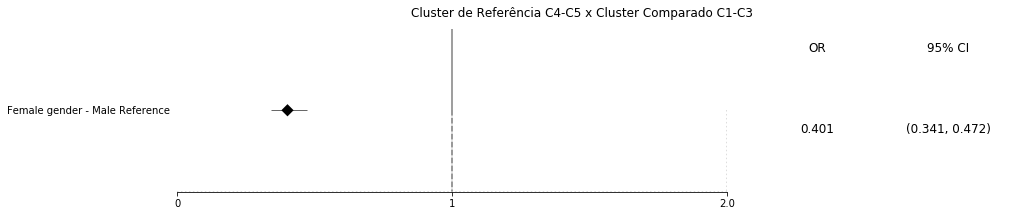

In [29]:
#  Comparando o conjunto de C4+C5 com o conjunto C1-C3 E C-6-C7
#  Considerado as co-variáveis: gênero (M e F)
#  Cluster de Referência: C4+C5
#  covariável de referência: Genero F ???????????????????????????


#p_value = [<0.001]

covar = ["Female gender - Male Reference"]

odds_ratio = [0.401]
lower = [0.341]
upper = [0.472]

forest_plot(odds_ratio, covar, lower, upper, "C4-C5", "C1-C3",3)

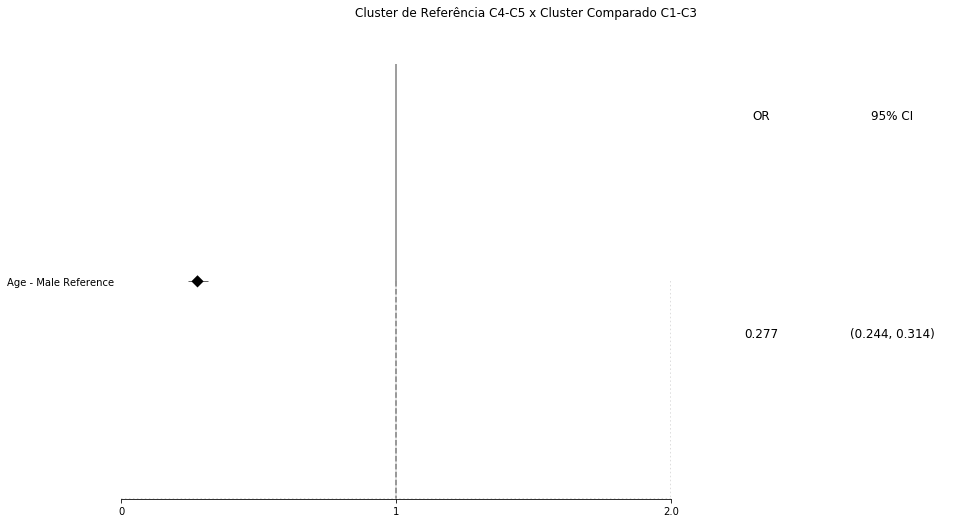

In [30]:
#p_value = [<0.001]

covar = ["Age - Male Reference"]

odds_ratio = [0.277]
lower = [0.244]
upper = [0.314]

forest_plot(odds_ratio, covar, lower, upper, "C4-C5", "C1-C3")

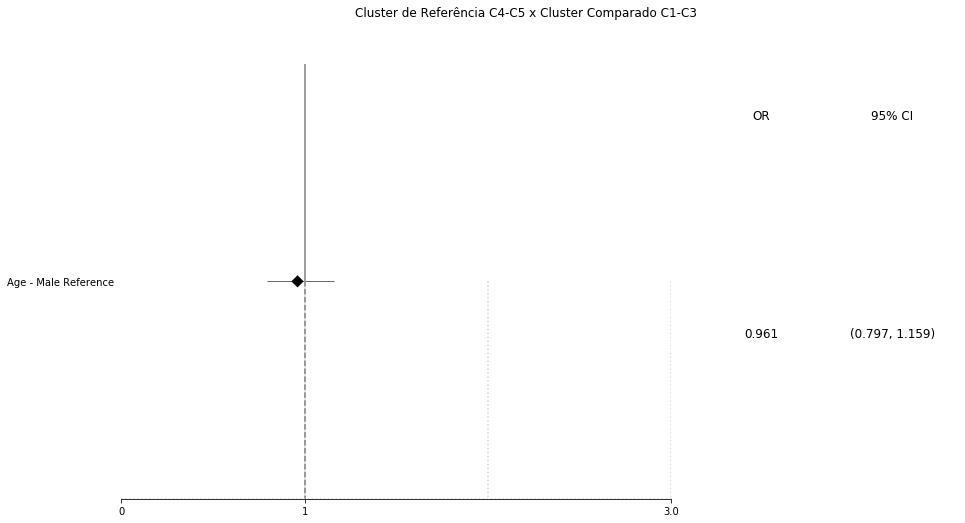

In [31]:

#p_value = [0.681]

covar = ["Age - Male Reference"]

odds_ratio = [0.961]
lower = [0.797]
upper = [1.159]

forest_plot(odds_ratio, covar, lower, upper, "C4-C5", "C1-C3")

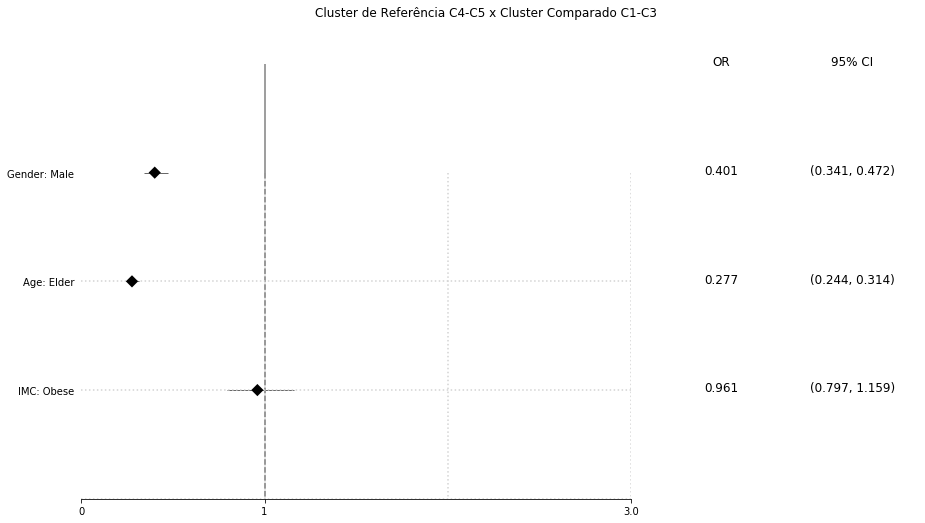

In [32]:
covar = ["Gender: Male", "Age: Elder","IMC: Obese"]

odds_ratio = [0.401, 0.277, 0.961]
lower = [0.341, 0.244, 0.797]
upper = [0.472, 0.314, 1.159]

forest_plot(odds_ratio, covar, lower, upper, "C4-C5", "C1-C3")

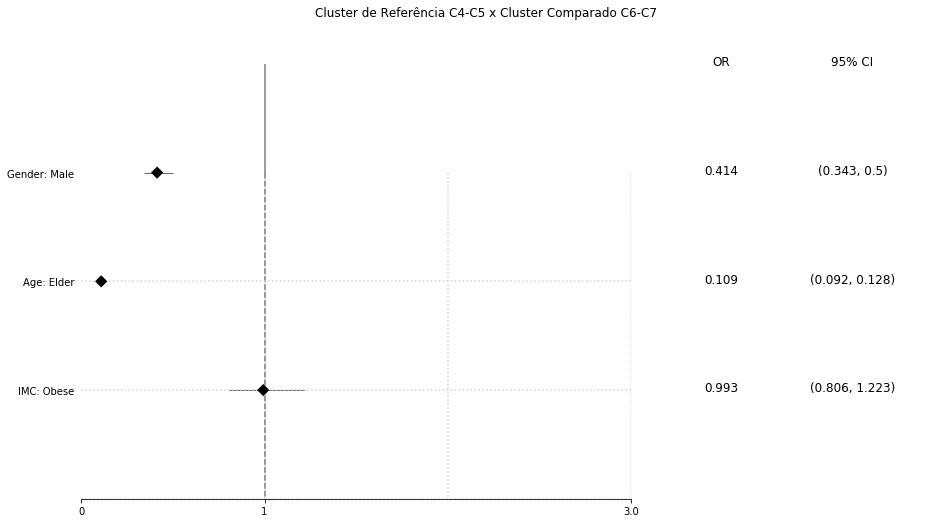

In [33]:
#p_value = [0.000, 0.000, 0.944]
covar = ["Gender: Male", "Age: Elder","IMC: Obese"]

odds_ratio = [0.414, 0.109, 0.993]
lower = [0.343, 0.092, 0.806]
upper = [0.500, 0.128, 1.223]

forest_plot(odds_ratio, covar, lower, upper, "C4-C5", "C6-C7")

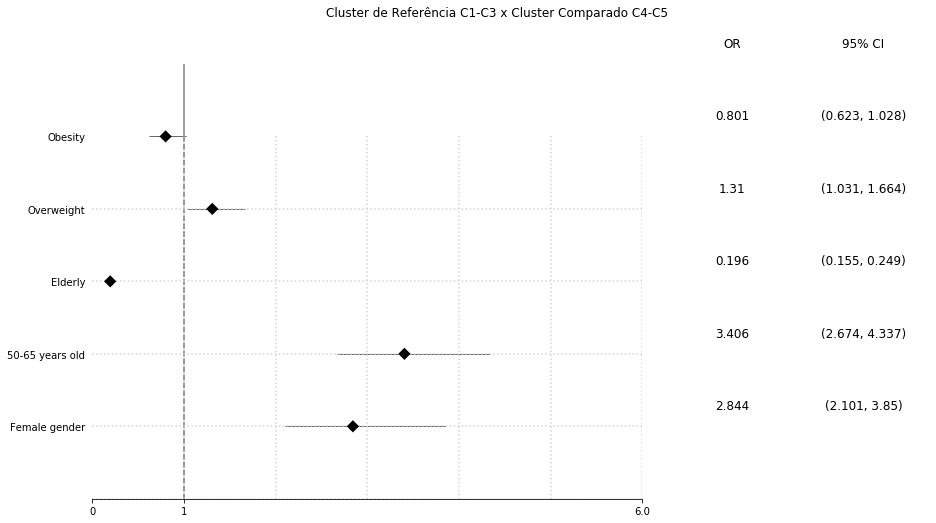

In [34]:
#  Comparando o conjunto de C1-C3 com o conjunto C4-C5
#
#   ????????????????????????????????? incluir o p_value
###################################################################


#p_value = [<0.001, <0.001, <0.001, 0.027, 0.082]

odds_ratio = [0.8006, 1.31, 0.196, 3.406, 2.844]
lower = [0.6234,1.031, 0.1551, 2.674, 2.101]
upper = [1.0277, 1.664,  0.2487, 4.337, 3.85]

forest_plot(odds_ratio, covariavel, lower, upper, "C1-C3", "C4-C5")

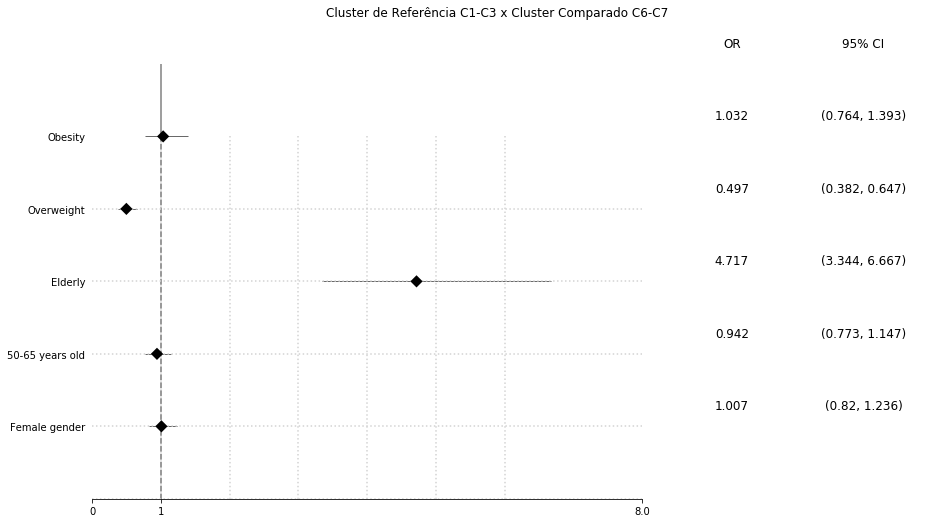

In [35]:
#  Comparando o conjunto de C1-C3 com o conjunto C6-C7
#
#   ????????????????????????????????? incluir o p_value
###################################################################

#p_value = [0.837, <0.001, <0.001, 0.550, 0.949 ]

odds_ratio = [1.032, 0.497, 4.717, 0.942, 1.007]
lower = [0.764, 0.382, 3.3445, 0.773, 0.8203]
upper = [1.393, 0.647, 6.667, 1.147,1.2361]

forest_plot(odds_ratio, covariavel, lower, upper, "C1-C3", "C6-C7")

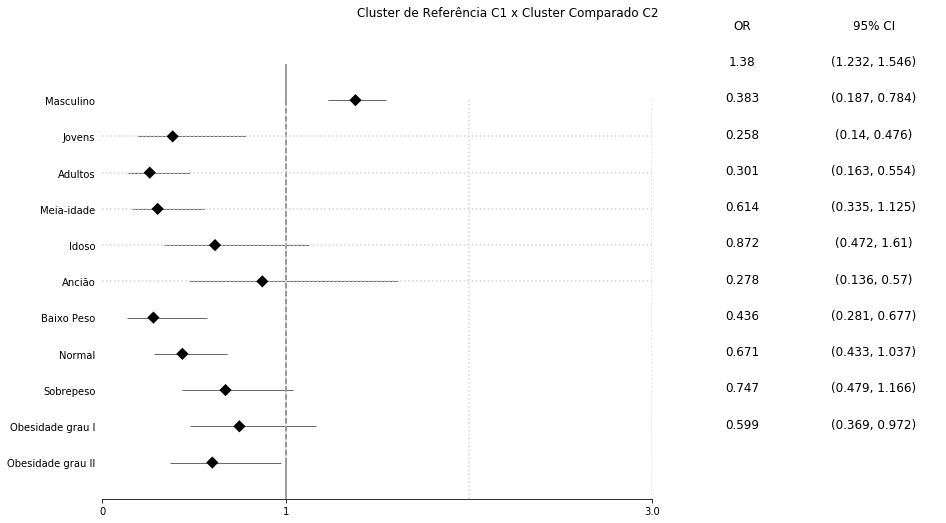

In [36]:
#[genero=0]
#[genero=1]
#[idade=1]
#[idade=2]
#[idade=3]
#[idade=4]
#[idade=5]
#[idade=6]
#[IMC=1]
#[IMC=2]
#[IMC=3]
#[IMC=4]
#[IMC=5]
#[IMC=6]
#
#1,38
#.
#0,383
#0,258
#0,301
#0,614
#0,872
#.
#0,278
#0,436
#0,671
#0,747
#0,599
#.

#0
#.
#0,009
#0
#0
#0,114
#0,661
#.
#0
#0
#0,073
#0,199
#0,038
#

    
#Jovens","Adultos","Meia-idade","Idoso", "Ancião","Velhice extrema
#Baixo Peso","Normal","Sobrepeso","Obesidade grau I","Obesidade grau II

covariavel = [
    "Masculino",
    "Jovens",
    "Adultos",
    "Meia-idade",
    "Idoso",
    "Ancião",
    "Baixo Peso",
    "Normal",
    "Sobrepeso",
    "Obesidade grau I",
    "Obesidade grau II"
       ]

odds_ratio = [
        1.38,
        0.383,
        0.258,
        0.301,
        0.614,
        0.872,
        0.278,
        0.436,
        0.671,
        0.747,
        0.599
]
lower = [
        1.232,
        0.187,
        0.14,
        0.163,
        0.335,
        0.472,
        0.136,
        0.281,
        0.433,
        0.479,
        0.369
]
upper = [
    1.546,
    0.784,
    0.476,
    0.554,
    1.125,
    1.61,
    0.57,
    0.677,
    1.037,
    1.166,
    0.972

]

forest_plot(odds_ratio, covariavel, lower, upper, "C1", "C2")

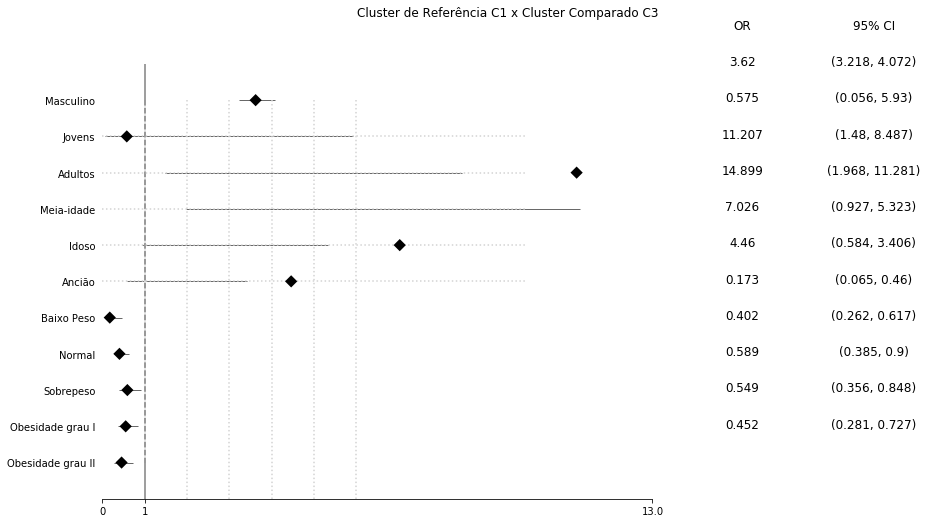

In [37]:
#0
#0,642
#0,019
#0,009
#0,059
#0,149
#0
#0
#0,014
#0,007
#0,001




covariavel = [
    "Masculino",
    "Jovens",
    "Adultos",
    "Meia-idade",
    "Idoso",
    "Ancião",
    "Baixo Peso",
    "Normal",
    "Sobrepeso",
    "Obesidade grau I",
    "Obesidade grau II"
       ]

odds_ratio = [
        3.62,
        0.575,
        11.207,
        14.899,
        7.026,
        4.46,
        0.173,
        0.402,
        0.589,
        0.549,
        0.452
]
lower = [
        3.218,
        0.056,
        1.48,
        1.968,
        0.927,
        0.584,
        0.065,
        0.262,
        0.385,
        0.356,
        0.281
]
upper = [
        4.072,
        5.93,
        8.4874,
        11.2808,
        5.3233,
        3.4064,
        0.46,
        0.617,
        0.9,
        0.848,
        0.727

]

forest_plot(odds_ratio, covariavel, lower, upper, "C1", "C3")

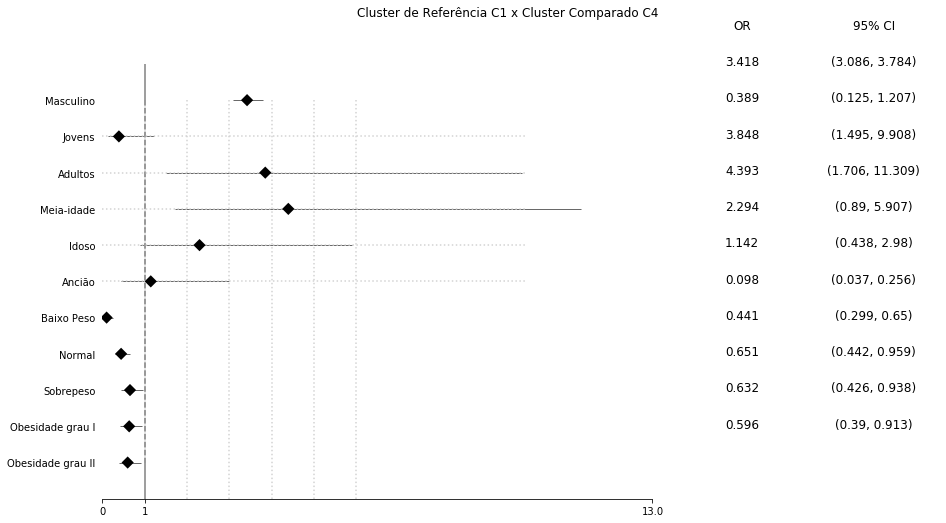

In [38]:
#0
#0,102
#0,005
#0,002
#0,086
#0,786
#0
#0
#0,03
#0,023
#0,017


covariavel = [
    "Masculino",
    "Jovens",
    "Adultos",
    "Meia-idade",
    "Idoso",
    "Ancião",
    "Baixo Peso",
    "Normal",
    "Sobrepeso",
    "Obesidade grau I",
    "Obesidade grau II"
       ]

odds_ratio = [
        3.418,
        0.389,
        3.848,
        4.393,
        2.294,
        1.142,
        0.098,
        0.441,
        0.651,
        0.632,
        0.596
]
lower = [
        3.086,
        0.125,
        1.495,
        1.706,
        0.89,
        0.438,
        0.037,
        0.299,
        0.442,
        0.426,
        0.39
]
upper = [
        3.784,
        1.207,
        9.908,
        11.309,
        5.907,
        2.98,
        0.256,
        0.65,
        0.959,
        0.938,
        0.913

]

forest_plot(odds_ratio, covariavel, lower, upper, "C1", "C4")

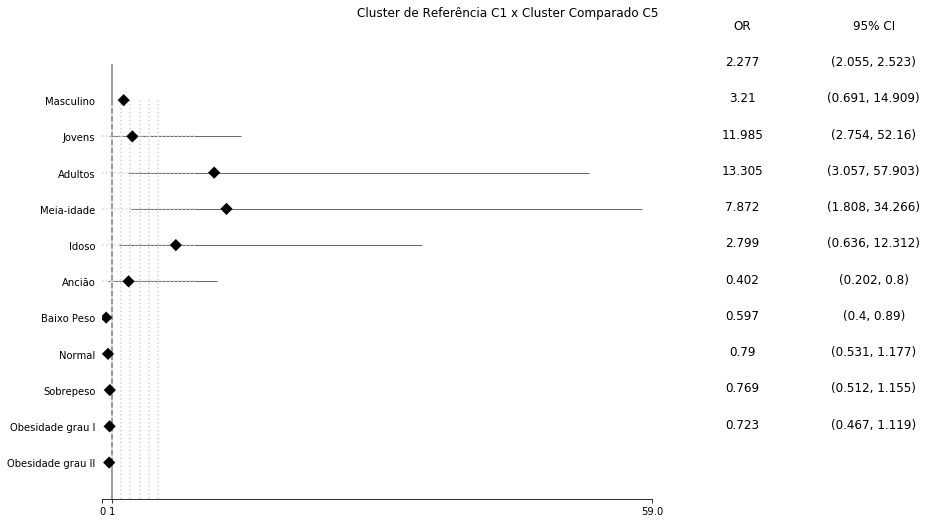

In [39]:
#0
#0,137
#0,001
#0,001
#0,006
#0,173
#0,009
#0,011
#0,247
#0,205
#0,146


covariavel = [
    "Masculino",
    "Jovens",
    "Adultos",
    "Meia-idade",
    "Idoso",
    "Ancião",
    "Baixo Peso",
    "Normal",
    "Sobrepeso",
    "Obesidade grau I",
    "Obesidade grau II"
       ]

odds_ratio = [
        2.277,
        3.21,
        11.985,
        13.305,
        7.872,
        2.799,
        0.402,
        0.597,
        0.79,
        0.769,
        0.723
]
lower = [
        2.055,
        0.691,
        2.754,
        3.057,
        1.808,
        0.636,
        0.202,
        0.400,
        0.531,
        0.512,
        0.467
]
upper = [
        2.523,
        14.909,
        52.16,
        57.903,
        34.266,
        12.312,
        0.8,
        0.89,
        1.177,
        1.155,
        1.119

]

forest_plot(odds_ratio, covariavel, lower, upper, "C1", "C5")

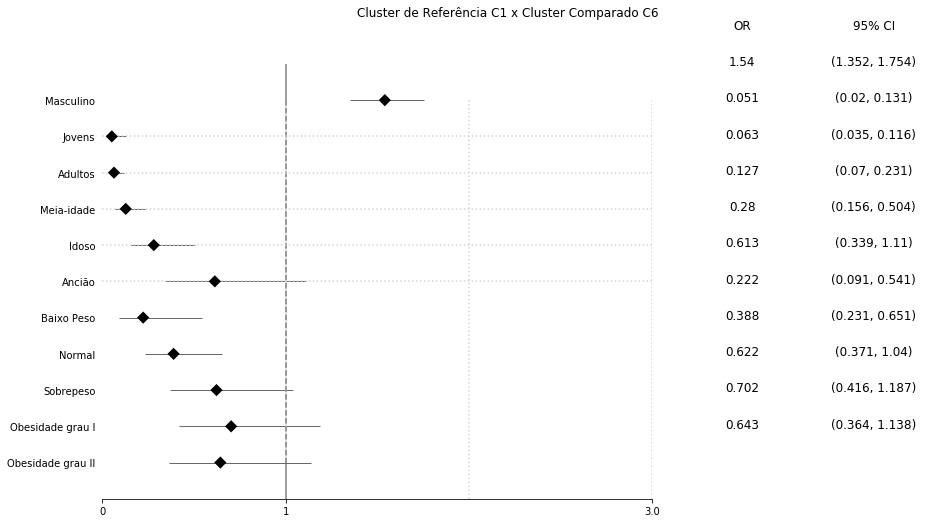

In [40]:
#0
#0
#0
#0
#0
#0,106
#0,001
#0
#0,07
#0,187
#0,13



covariavel = [
    "Masculino",
    "Jovens",
    "Adultos",
    "Meia-idade",
    "Idoso",
    "Ancião",
    "Baixo Peso",
    "Normal",
    "Sobrepeso",
    "Obesidade grau I",
    "Obesidade grau II"
       ]

odds_ratio = [
        1.54,
        0.051,
        0.063,
        0.127,
        0.28,
        0.613,
        0.222,
        0.388,
        0.622,
        0.702,
        0.643
]
lower = [
1.352,
        0.020,
        0.035,
        0.070,
        0.156,
        0.339,
        0.091,
        0.231,
        0.371,
        0.416,
        0.364
]
upper = [
        1.754,
        0.131,
        0.116,
        0.231,
        0.504,
        1.11,
        0.541,
        0.651,
        1.04,
        1.187,
        1.138

]

forest_plot(odds_ratio, covariavel, lower, upper, "C1", "C6")

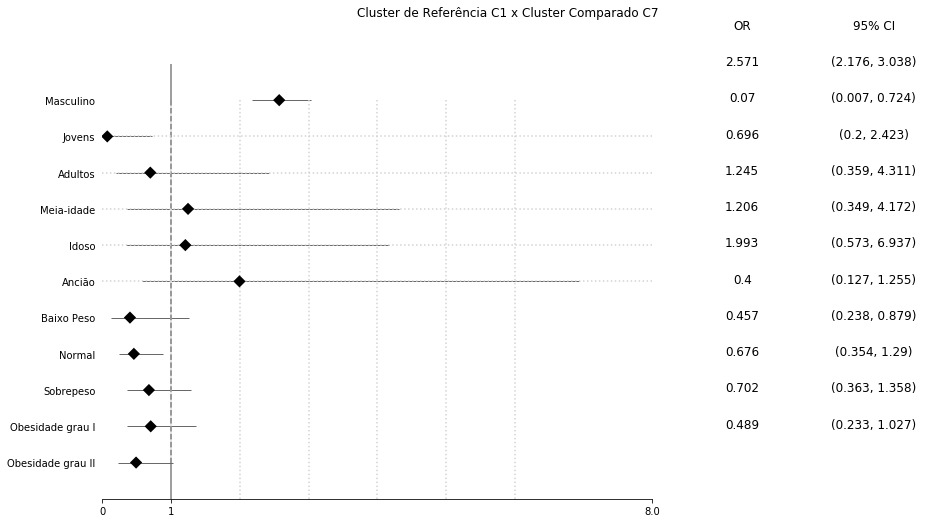

In [41]:
# p_value
#0
#0,026
#0,57
#0,73
#0,768
#0,278
#0,116
#0,019
#0,235
#0,293
#0,059


covariavel = [
    "Masculino",
    "Jovens",
    "Adultos",
    "Meia-idade",
    "Idoso",
    "Ancião",
    "Baixo Peso",
    "Normal",
    "Sobrepeso",
    "Obesidade grau I",
    "Obesidade grau II"
       ]

odds_ratio = [
        2.571,
        0.07,
        0.696,
        1.245,
        1.206,
        1.993,
        0.4,
        0.457,
        0.676,
        0.702,
        0.489
]
lower = [
        2.176,
        0.007,
        0.200,
        0.359,
        0.349,
        0.573,
        0.127,
        0.238,
        0.354,
        0.363,
        0.233
]
upper = [
        3.038,
        0.724,
        2.423,
        4.311,
        4.172,
        6.937,
        1.255,
        0.879,
        1.29,
        1.358,
        1.027

]

forest_plot(odds_ratio, covariavel, lower, upper, "C1", "C7")

In [42]:
#covariavel = ["Obesity",
#        "Overweight",
#        "Elderly",
#         "50-65 years old",
#        "Female gender"
#       ]
#measure = [0.8006, 1.31, 0.196, 3.406, 2.844]
#lower = [0.6234,1.031, 0.1551, 2.674, 2.101]
#upper = [1.0277, 1.664,  0.2487, 4.337, 3.85]
#
#def forest_plot(x, y, x_min, x_max):
#    xerro = [[],[]]
#    for i in range(len(x)):
#        xerro[0].append(x[i] - x_min[i])
#        xerro[1].append(x_max[i] - x[i])
#    plt.rcParams.update({'font.size':14})
#    plt.figure(figsize=(8,5))
#    plt.errorbar(x, y, xerr=xerro, fmt='o', ecolor='black', mfc='red', mec='black', mew=2, ms=10, capsize=5)
#    plt.title("Cluster de Referência (C1, C2, C3)", fontsize = 20)
#    plt.xlim([0, np.ceil(max(x_max))])
#    plt.grid()
#    plt.show()
#
#    
#
#forest_plot(measure, covariavel, lower, upper)

In [43]:
from sklearn import linear_model
import numpy as np
import scipy.stats as stat

class MNLogisticReg(linear_model.LogisticRegression):
    
    def __init__(self, *args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)
        if 'fit_intercept' in kwargs.keys():           
            self._fit_intercept = kwargs['fit_intercept']

    def fit(self,X,y):
        self.model.fit(X,y)
        #### Get p-values for the fitted model ####
        denom = (2.0*(1.0+np.cosh(self.model.decision_function(X))))
        p_values = []
        z_scores = []
        self.columns = list(X.columns)

        #if self._fit_intercept:
        #    X = np.hstack([np.ones((X.shape[0], 1)), X])
           
        for i in range(denom.shape[1]):
            d = denom[:,i]        
            
            #if self._fit_intercept:
            #    self.coef = np.column_stack((self.model.intercept_, self.model.coef_))
            #else:
            #    self.coef = self.model.coef_
            self.coef = self.model.coef_
            d = np.tile(d,(X.shape[1],1)).T
            F_ij = np.dot((X/d).T,X) ## Fisher Information Matrix
            Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix  
            sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
            z_score = (self.coef[i]/sigma_estimates) # z-score for each model coefficient
            z_scores.append(z_score)
            p_vals = [stat.norm.sf(abs(i))*2 for i in z_score] ### two tailed test for p-values
            p_values.append(p_vals)
            
        self.z_scores = np.array(z_scores)
        self.p_values = np.array(p_values)
        self.sigma_estimates = sigma_estimates
        self.F_ij = F_ij

    # A function to create an output in form of pandas dataframe, with regressors and intercept in
    # rows and coefficients in columns. Coefficients, p-values and z-scores are calculated for each
    # pair of classes in the dependent variable
    
    def printstats(self):      
        data = None
        for i in range(self.coef.shape[0]):
            if data is None:
                data = np.vstack(( self.coef[i,:], self.p_values[i,:], self.z_scores[i,:])).T
            else:
                d0 = np.vstack(( self.coef[i,:], self.p_values[i,:], self.z_scores[i,:])).T
                data = np.hstack((data,d0))
        # data is reshaped in the correct order
        regr = []
        for item in list(itertools.combinations(list(dep_acute.unique()), 2)):
            regr.append('{} vs {}'.format(item[0], item[1]))
            
        functions = ['coef', 'P-value', 'Z-score']
        column_names = [([i] + [j]) for i in regr for j in functions] 
        index = pd.MultiIndex.from_tuples(column_names)
        predictors = self.columns
        if self._fit_intercept:
            ind = ['intercept'] + predictors
        else:
            ind = predictors
        self.stats = pd.DataFrame(data, columns = index, index = ind)
        return self.stats

In [44]:
model = MNLogisticReg(solver = 'newton-cg',random_state=0, multi_class ='multinomial')

In [45]:
model.fit(pd.DataFrame(X), y)

In [46]:
model.p_values

array([[0.73573465, 0.58936897, 0.17355628, 0.75243111],
       [0.48826145, 0.72079804, 0.81136607, 0.47927577],
       [0.89384454, 0.59218331, 0.04581581, 0.35145241]])

In [47]:
clf.predict(X[:, :])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [48]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [49]:
clf.predict_proba(X[:5, :])

array([[9.81583492e-01, 1.84164930e-02, 1.44986986e-08],
       [9.71336319e-01, 2.86636512e-02, 3.01930552e-08],
       [9.85276828e-01, 1.47231595e-02, 1.23376791e-08],
       [9.76066462e-01, 2.39334983e-02, 3.97043656e-08],
       [9.85234854e-01, 1.47651339e-02, 1.20035768e-08]])

In [50]:
clf.predict_proba(X[:2, :])

array([[9.81583492e-01, 1.84164930e-02, 1.44986986e-08],
       [9.71336319e-01, 2.86636512e-02, 3.01930552e-08]])

In [51]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [52]:
#df_alternativo = df_genero.loc[['Masculino','Feminino'],['cluster 1', 'cluster 2']]
#df_alternativo.loc['Feminino','cluster 1'] += df_alternativo.loc['Masculino','cluster 1']
#df_alternativo.loc['Feminino','cluster 2'] += df_alternativo.loc['Masculino','cluster 2']
#df_alternativo.index = ['Masculino','Total']
#df_alternativo

In [53]:
#stats.fisher_exact(df_alternativo)

In [54]:
# A hipótese H0 é da ocorrer Diastólica Isolada no Cluter 1 E Sistólica Isolada no Cluster 2
# A hipótese H1 é de ocorrer Diastólica Isolada no Cluster 2 E Sisólica Isolada no Cluster 1
# Casos positivos: Ser do cluster 1 e ter a doença 1, ser do cluster 2 e ter a doença 2
# Casos negativos: Ser do cluster 1 e ter a doença 2, ser do cluster 2 e ter a doença 1
# Odds ratio é a probabilidade de ocorrência de casos positivos em ralação ao negativos
# Odds ratio = 0.4
#df

#df = df_doencas.iloc[[1,0],[0,1]]
#p_value = np.round(stats.fisher_exact(df)[1])
#p_value
#stats.fisher_exact(df,alternative='less')

In [55]:
df_abordagem = pd.read_csv(lista_caminhos[0], sep=";", encoding='latin1')
df_abordagem.index = df_abordagem['Cluster'].values
df_abordagem = df_abordagem.drop(['Cluster'], axis = 1)
df_imc = df_abordagem.loc[['Peso Normal','Sobrepeso','Obesidade'], :]
#df_imc = df_abordagem.loc[['Abaixo do peso','Peso Normal','Sobrepeso','Obesidade grau 1','Obesidade grau 2','Obesidade Grau 3'], :]
#saida_imc = analisa_imc(df_imc)
df_imc

,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7
Peso Normal,1138.0,1162.0,520.0,842.0,211.0,576.0,1092.0
Sobrepeso,1115.0,1808.0,773.0,1238.0,338.0,1078.0,2040.0
Obesidade,713.0,1153.0,454.0,765.0,193.0,644.0,1297.0


In [56]:
'''
                cluster 1    cluster 2
abaixo do peso         54           31
peso normal          1107          811


              Variável Y
Variável X    Sim     Não
Sim            a-Positivo     c-Negativo
Não            b-Negativo     d-Positivo

OR = (a / b) / (c / d) = (a * d) / (b * c)

'''
#a = np.sum(df_imc.loc['Abaixo do peso':'Peso Normal','cluster 1'])
#b = np.sum(df_imc.loc['Sobrepeso':,'cluster 1'])
#c = np.sum(df_imc.loc['Abaixo do peso':'Peso Normal','cluster 2'])
#d = np.sum(df_imc.loc['Sobrepeso':,'cluster 2'])
#
#matriz = np.array([[a, c], [b, d]])
#
#import scipy.stats as stats
#stats.fisher_exact([[54,31],[1107,811]],alternative='two-sided')
#

'\n                cluster 1    cluster 2\nabaixo do peso         54           31\npeso normal          1107          811\n\n\n              Variável Y\nVariável X    Sim     Não\nSim            a-Positivo     c-Negativo\nNão            b-Negativo     d-Positivo\n\nOR = (a / b) / (c / d) = (a * d) / (b * c)\n\n'

In [57]:
#print(matriz)
'''
alternative='two-sided' = a probabilidade de H0 ser igual a H1
alternative='less' H1 ser menor que H0
alternative='greater' H1 ser maior que H0
'''
#stats.fisher_exact(matriz,alternative='two-sided')

"\nalternative='two-sided' = a probabilidade de H0 ser igual a H1\nalternative='less' H1 ser menor que H0\nalternative='greater' H1 ser maior que H0\n"

In [58]:
#
#df_categorias = pd.read_csv(caminho_categorias, sep=";", encoding='latin1')
#df_categorias.index = df_categorias['Cluster'].values
#df_categorias = df_categorias.drop(['Cluster'], axis = 1)
#df_categorias

In [59]:
#df_genero = df_categorias.loc[['Masculino','Feminino'], :]
#df_genero
#

In [60]:
#df_idade = df_categorias.loc[['Jovens','Adultos','Meia-idade','Idoso','Ancião','Velhice extrema'], :]
#df_idade

In [61]:
def forest_plot2(x, y, x_min, x_max, cluster_referencia, cluster_comparado, variavel):
    p = EffectMeasurePlot(label=y, effect_measure=x, lcl=x_min, ucl=x_max)
    p.labels(effectmeasure='OR')
    p.colors(pointshape="D")
    ax=p.plot(figsize=(15,8), t_adjuster=0.13, max_value=np.ceil(max(x_max)), min_value=0 )
    #plt.title("Forrest Plot",loc="center",x=-0.65, y=1.05)
    plt.suptitle(f"Cluster de Referência {cluster_referencia} x Cluster Comparado {cluster_comparado} - {variavel}")#,x=-0.1,y=0.98)
    #ax.set_xlabel("Favours Control      Favours Haloperidol       ", fontsize=10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(False)

    ax.vlines([1],0,10,linestyles='solid', colors='white')
    ax.vlines([1],0,10,linestyles='dashed', colors='gray')
    
    ax.vlines([2,3,4,5,6],0,20,linestyles='dotted', colors='lightgray')
    ax.hlines([1,2,3,4,5],0,10,linestyles='dotted', colors='lightgray')
    
    plt.grid()
    ax.set_label("Odds ratio (OR)")
    plt.savefig(DIR_BASE / "graficos_analise" / "forest_plot" / f"forest_{cluster_referencia}_x_{cluster_comparado}.svg",bbox_inches='tight')
    plt.show()

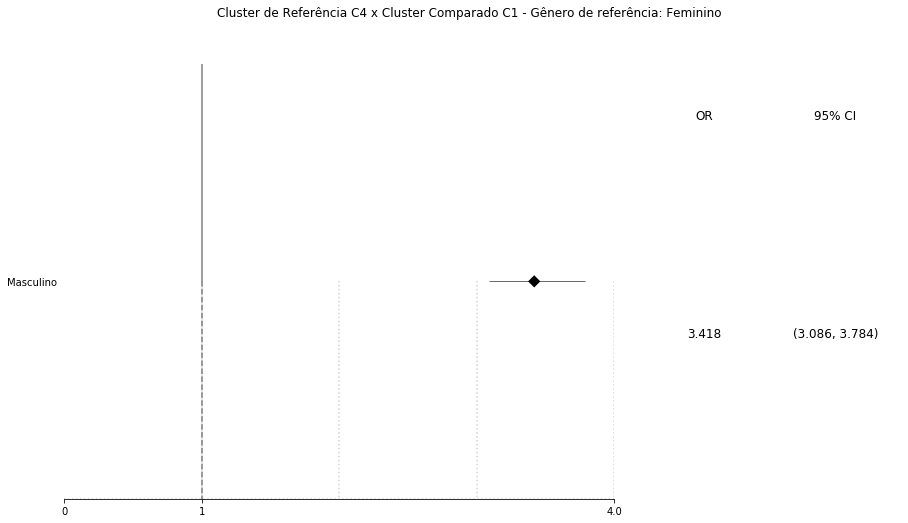

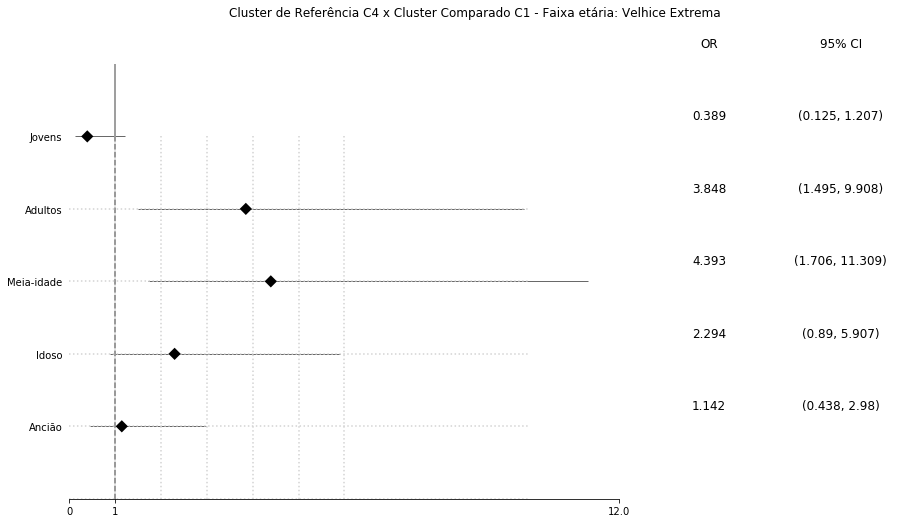

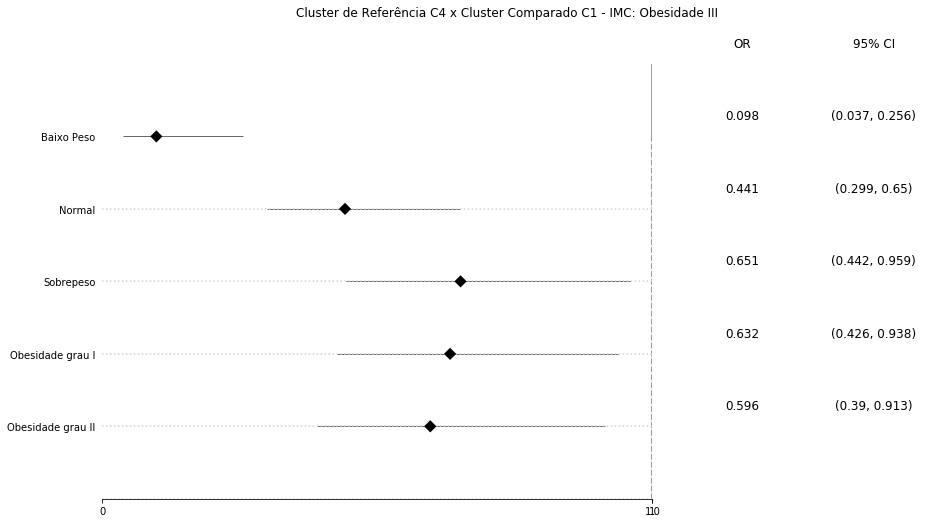

In [62]:
#0
#0,102
#0,005
#0,002
#0,086
#0,786
#0
#0
#0,03
#0,023
#0,017


covariavel_genero = [
    "Masculino",

       ]

covariavel_idade = [
    "Jovens",
    "Adultos",
    "Meia-idade",
    "Idoso",
    "Ancião"
       ]

covariavel_imc = [
    "Baixo Peso",
    "Normal",
    "Sobrepeso",
    "Obesidade grau I",
    "Obesidade grau II"
       ]

odds_ratio_genero = [
        3.418
]

odds_ratio_idade = [
        0.389,
        3.848,
        4.393,
        2.294,
        1.142
]

odds_ratio_imc = [
        0.098,
        0.441,
        0.651,
        0.632,
        0.596
]

lower_genero = [
        3.086
]

lower_idade = [
        0.125,
        1.495,
        1.706,
        0.89,
        0.438
]

lower_imc = [
        0.037,
        0.299,
        0.442,
        0.426,
        0.39
]

upper_genero = [
        3.784
]

upper_idade = [
        1.207,
        9.908,
        11.309,
        5.907,
        2.98
]

upper_imc = [
        0.256,
        0.65,
        0.959,
        0.938,
        0.913

]

forest_plot2(odds_ratio_genero, covariavel_genero, lower_genero, upper_genero, "C4", "C1","Gênero de referência: Feminino")
forest_plot2(odds_ratio_idade, covariavel_idade, lower_idade, upper_idade, "C4", "C1","Faixa etária: Velhice Extrema")
forest_plot2(odds_ratio_imc, covariavel_imc, lower_imc, upper_imc, "C4", "C1","IMC: Obesidade III")
#forest_plot2(odds_ratio_genero, covariavel_genero, lower_genero, upper_genero, "C4", "C1","Gênero")